# Early Stage Diabetes Prediction 

#### Using the Early stage diabetes risk prediction dataset, I built ML models to predict who is likely to be at risk of diabetes given a set of attributes.
Data Source: https://archive.ics.uci.edu/ml/datasets/Early+stage+diabetes+risk+prediction+dataset.

Import Relevant Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectFromModel


# ignore warnings
import warnings
warnings.filterwarnings("ignore")

## Data Assembly

In [2]:
# Import diabetes dataset
diabetes = pd.read_csv("diabetes_data_upload.csv")
diabetes

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


## Exploratory Data Analysis

In [3]:
# Get info about the dataset
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

The info() method provides a quick and useful information about the dataset. From the output, we can observe that there are 520 rows in the dataset. Additionally there are 17 columns. Apart from the column 'Age', which is of datatype 'int', the rest of the columns are of datatype 'object'. Finally, there are no null values in the dataset. 

In [4]:
# Describe the dataset
diabetes.describe()

,Age
count,520.000000
mean,48.028846
std,12.151466
min,16.000000
25%,39.000000
50%,47.500000
75%,57.000000
max,90.000000


The describe() function provides basic statics of the numerical columns. In this case, since we have only the 'Age' column as numerical, we get the basic statistics of 'Age'. We can observe that the mean age of the patients is 48 years whiles the minimum and maximum age is 16 and 90 years respectively. 

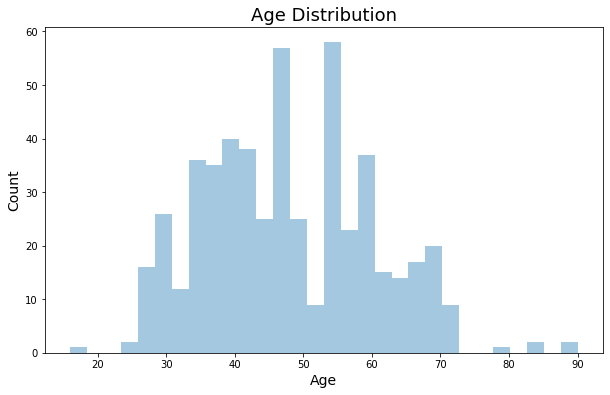

In [5]:
# Plot the age distribution
plt.figure(figsize=(10, 6))
sns.distplot(diabetes['Age'], kde=False, bins=30)
plt.title('Age Distribution', fontsize=18)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

The above graph shows the distribution of the ages of the patients. The graph largely follows a normal distribution. This is also consistent with the mean and median values since they are close (mean of 48 and median of 47.5).

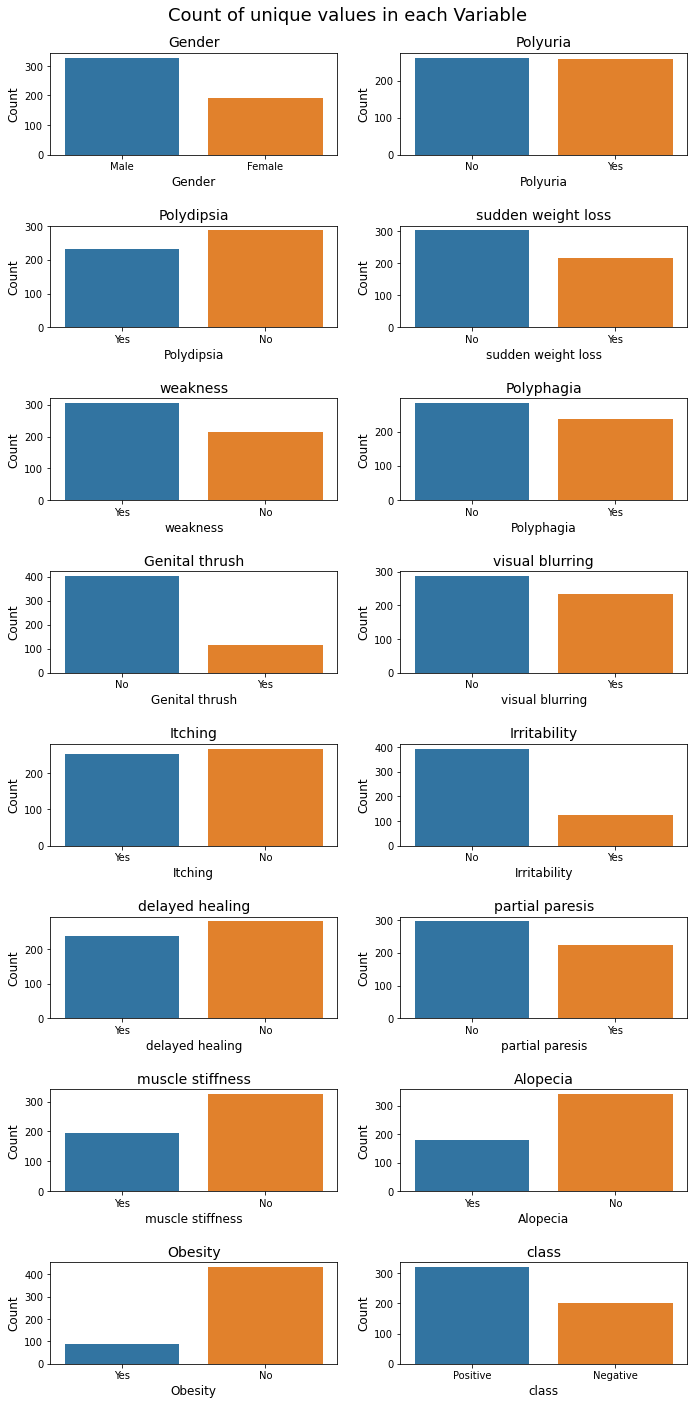

In [6]:
# Plot each variable in a subplot to see the distribution
cols = diabetes.columns[1:]
fig, axes = plt.subplots(8, 2, figsize=(10, 20))
# Add title
fig.suptitle('Count of unique values in each Variable', fontsize=18)
for i, col in enumerate(cols):
    sns.countplot(x=col, data=diabetes, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(col, fontsize=14)
    axes[i//2, i%2].set_xlabel(col, fontsize=12)
    axes[i//2, i%2].set_ylabel('Count', fontsize=12)
fig.tight_layout(pad=2.0)
 
 

The above plot shows the frequency of the unique values in each of the variables. From the plot we can observe that some of the variables' values are imbalanced. Example include the 'Age', 'Obesity' etc. The one of particular interest is the 'class' variable which is imbalanced. Because the 'class' variable is imbalanced, it means we wont be using accuracy as a metric for assessing the performance of the model we will be building. In this classification task, we will be using Precision, Recall and F1-score to assess the performance of the model.

## Preprocessing

In [7]:
# Use Label Encoder to convert categorical variables to numerical
le = LabelEncoder()
diabetes[cols] = diabetes[cols].apply(le.fit_transform)
diabetes

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,48,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,58,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,32,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0


When we loaded the dataset, we realized that apart from the 'Age' column, the rest of the variables were of type 'object'. This means that we would have to convert the categorical variables into numerical one before it is passed into the model. We did that with the label encoder.

In [8]:
# Split the dataset into train and test
X = diabetes.drop('class', axis=1)
y = diabetes['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Standardize the X_train and X_test
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Modelling - Percentage Split - Without Feature Selection

In the following cells, we will conduct an experiment of modelling without feature selection versus modelling with feature selection to assess which option yields the better results. Again, we will conduct percentage split and cross validation in each case.

In [10]:
# Write a function to train the model with Random Forest, Naive Bayes and Artificial Neural Network and return the recall, precision and f1 score
def train_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    # Get the recall, precision and f1 score
    recall = report['1']['recall']
    precision = report['1']['precision']
    f1 = report['1']['f1-score']
    return recall, precision, f1

In [11]:
# Define the models
rf = RandomForestClassifier()
nb = GaussianNB()
ann = MLPClassifier()

models = [rf, nb, ann]
model_names = ['Random Forest', 'Naive Bayes', 'Artificial Neural Network']

In [12]:
# Train the models and get the metrics
def getMetrics(models, model_names):
    metrics = []
    for model in models:
        recall, precision, f1 = train_model(model, X_train, y_train, X_test, y_test)
        metrics.append([recall, precision, f1])
    metrics = pd.DataFrame(metrics, index=model_names, columns=['Recall', 'Precision', 'F1 Score'])
    return metrics

In [13]:
# Plot the metrics
def plotMetrics(metrics):
    metrics.plot(kind='bar', figsize=(10, 6))
    # Get annotaions of the scores on the bars
    for p in plt.gca().patches:
        plt.gca().annotate('{:.3f}'.format(p.get_height()), (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    plt.title('Model Performance', fontsize=18)
    plt.xlabel('Model', fontsize=14)
    plt.ylabel('Score', fontsize=14)
    # put the legend outside the plot
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()


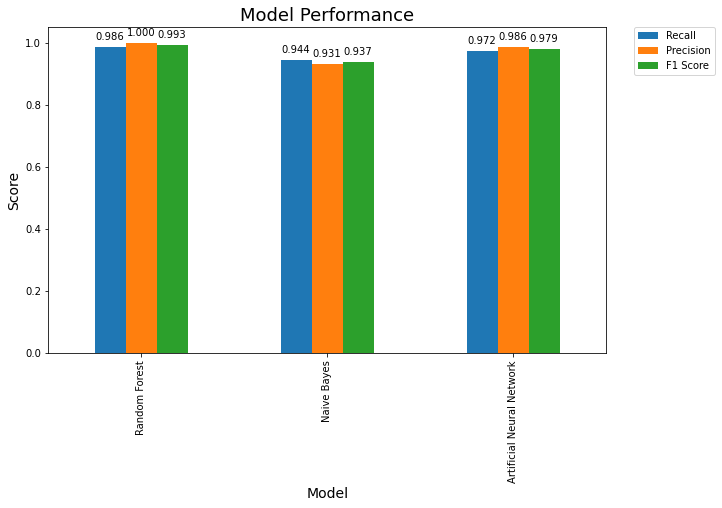

In [14]:
# Get the metrics
metrics = getMetrics(models, model_names)
perc_no_feature_selection = metrics

# Plot the metrics
plotMetrics(metrics)

After modelling with the full set of features with percentage split, we recorded a very high performance for all three models. Random Forest performed the best among the rest with a precision of 100%, recall of 98.6% and an F1-score of 99.3%. The least performing among the other two was Naive Bayes having a precision of 93.1%, recall of 94.4% and an F1-score of 93.7%

## Modelling - Cross Validation - Without Feature Selection

In [15]:
# Kfold cross validation
cv = KFold(n_splits=10, random_state=42, shuffle=True)

# Define GridSearchCV for Random Forest
rf_params = {'n_estimators': [10, 50, 100, 200, 500, 1000], 'max_depth': [2, 3, 5, 10, 20, 50, 100]} 

# Define GridSearchCV for Naive Bayes
nb_params = {'var_smoothing': np.logspace(0,-9, num=100)}

# Define GridSearchCV for Artificial Neural Network
ann_params = {'max_iter': [200, 500, 1000, 2000, 5000, 10000]}

In [16]:
# Find the best parameters for each model
rf_grid = GridSearchCV(rf, rf_params, cv=cv, scoring='f1')
rf_grid.fit(X, y)
rf_best_params = rf_grid.best_params_

In [17]:
nb_grid = GridSearchCV(nb, nb_params, cv=cv, scoring='f1')
nb_grid.fit(X, y)
nb_best_params = nb_grid.best_params_

In [18]:
ann_grid = GridSearchCV(ann, ann_params, cv=cv, scoring='f1')
ann_grid.fit(X, y)
ann_best_params = ann_grid.best_params_

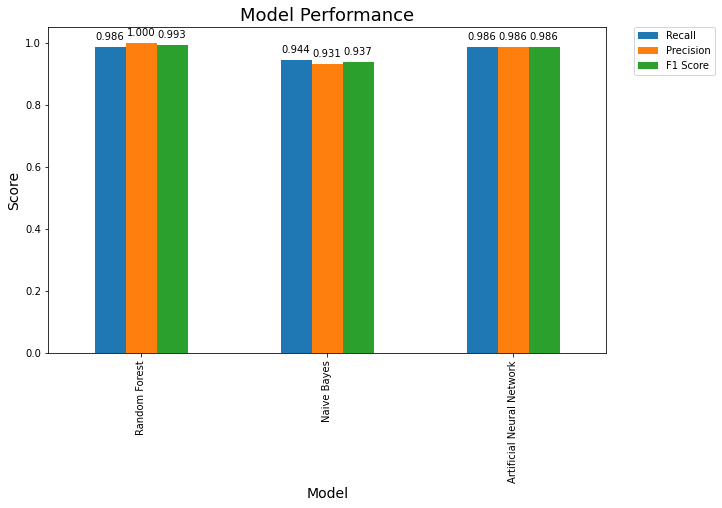

In [19]:
# Fit each model with the best parameters
rf = RandomForestClassifier(**rf_best_params)
nb = GaussianNB(**nb_best_params)
ann = MLPClassifier(**ann_best_params)
models = [rf, nb, ann]

# Train the models and get the metrics
metrics = getMetrics(models, model_names)
cross_no_feature_selection = metrics
# Plot the metrics
plotMetrics(metrics)


After applying cross validation, the performance of the Random Forest model remained the same. This means the crossvalidation did not have any effect on the performance of the model. The same for Naive Bayes as well.

However, there was a slight improvement of the Artificial Nueral Network model after tuning the hyperparameters and using the best hyperparameters. This gave a 98.6% score across all three metrics.


## Feature Selection using Random Forest

In the following cells I performed feature selection to assess whether it will result in a further improvement in the model

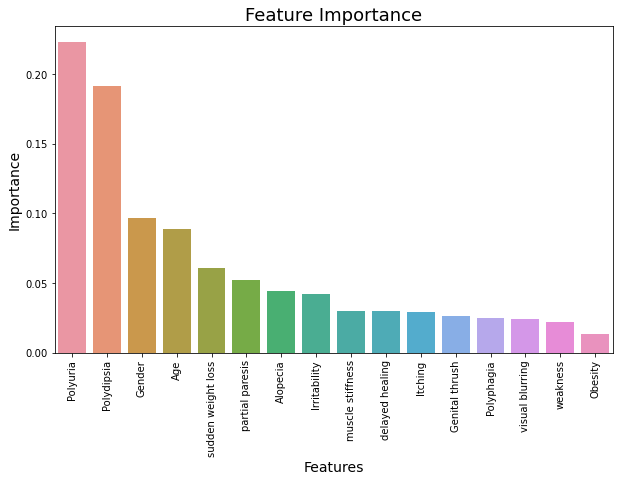

In [20]:
# Conduct feature selection using Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
feature_importances = pd.DataFrame(rf.feature_importances_, index = X.columns, columns=['importance']).sort_values('importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances.index, y=feature_importances['importance'])
plt.xticks(rotation=90)
plt.title('Feature Importance', fontsize=18)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Importance', fontsize=14)
plt.show()


After using the Random Forest, it can be observed that 'Age', 'Gender', 'Polyuria', 'Polydipsia', and 'sudden weight loss' are the top 5 important features. Obesity is the least important feature. 

## Feature Selection using Recursive Feature Elimination

In [21]:
# Initialize the models
rf = RandomForestClassifier()

# Get feature importance from the random forest model using RFE
rfe = RFE(rf, 5)
rfe = rfe.fit(X_train, y_train)
print(rfe.support_)
print(rfe.ranking_)
# Get the features selected by RFE
features = X.columns[rfe.support_]
features
 

[ True  True  True  True  True False False False False False False False
 False False False False]
[ 1  1  1  1  1 11  9 10  8  6  2  5  3  7  4 12]


Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss'], dtype='object')

After using the Recursive Feature Elimination method, 'Age', 'Gender', 'Polyuria', 'Polydipsia', and 'sudden weight loss' were the selected features. 

In [22]:
# Use selected features to train the models
X = X.iloc[:, rfe.support_] # Use only the selected features

# Split the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Modelling Percentage Split

In [23]:
# Define the models
rf = RandomForestClassifier()
nb = GaussianNB()
ann = MLPClassifier()

models = [rf, nb, ann]

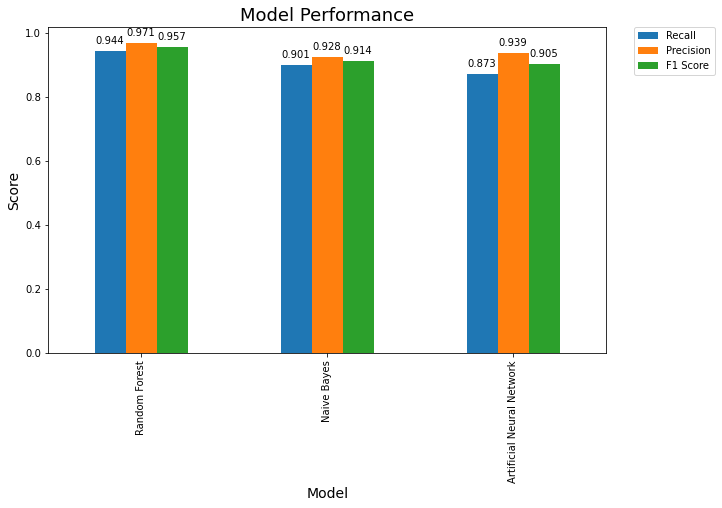

In [24]:
# Train the models and get the metrics
metrics = getMetrics(models, model_names)
perc_feature_selection = metrics

# Plot the metrics
plotMetrics(metrics)

Using the selected features, I did another training with percentage split and the results showed a slight decline in the performance of the model. This means that by selecting some features and leaving the rest, some information carried by the other variables were lost, hence the slight decline in the results. 

## Cross Validation

In [25]:
# Find the best parameters for Random Forest
rf_grid = GridSearchCV(rf, rf_params, cv=cv, scoring='f1')
rf_grid.fit(X, y)
rf_best_params = rf_grid.best_params_

In [26]:
# Find the best parameters for Naive Bayes
nb_grid = GridSearchCV(nb, nb_params, cv=cv, scoring='f1')
nb_grid.fit(X, y)
nb_best_params = nb_grid.best_params_

In [27]:
# Find the best parameters for Artificial Neural Network
ann_grid = GridSearchCV(ann, ann_params, cv=cv, scoring='f1')
ann_grid.fit(X, y)
ann_best_params = ann_grid.best_params_

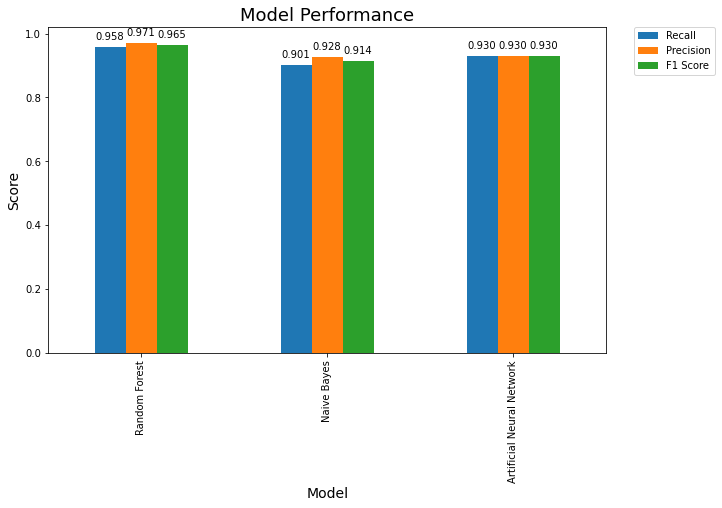

In [28]:
# Fit each model with the best parameters
rf = RandomForestClassifier(**rf_best_params)
nb = GaussianNB(**nb_best_params)
ann = MLPClassifier(**ann_best_params)
models = [rf, nb, ann]

# Train the models and get the metrics
metrics = getMetrics(models, model_names)
cross_feature_selection = metrics

# Plot the metrics
plotMetrics(metrics)

From the above plot, there was a slight decline in the performance compared with the performance of the models without feature selection. This also goes to say that removing some features resulted in the lost of some information. However, the Artificial Neural Network and Naive Bayes performed the same (cross validation and percentage split) after feature selection. There was only a slight difference in performance for the Random Forest (cross validation and percentage split) after feature selection. 

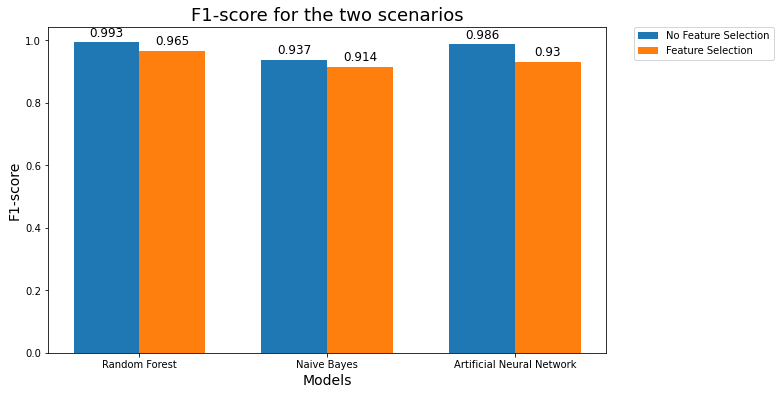

In [41]:
# Make a side by side bar plot of F1-score for each model across the 2  scenarios and cross validation
plt.figure(figsize=(10, 6))
x_axis = np.arange(len(model_names))
width = 0.35
plt.bar(x_axis - width/2, cross_no_feature_selection['F1 Score'], width, label='No Feature Selection')
plt.bar(x_axis + width/2, cross_feature_selection['F1 Score'], width, label='Feature Selection')
# Annotate the bars
for i, v in enumerate(cross_no_feature_selection['F1 Score']):
    plt.text(i - width/2, v + 0.01, str(round(v, 3)), ha='center', va='bottom', fontsize=12)
for i, v in enumerate(cross_feature_selection['F1 Score']):
    plt.text(i + width/2, v + 0.01, str(round(v, 3)), ha='center', va='bottom', fontsize=12)
plt.xticks(ticks=x_axis, labels=model_names)
plt.title('F1-score for the two scenarios', fontsize=18)
plt.xlabel('Models', fontsize=14)
plt.ylabel('F1-score', fontsize=14)
# Put the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()


To conclude, it is obvious that modelling with all the variables, produces the best results compared with doing feature selection. Additionally, The Random Forest model performs the best among Naive Bayes and Artificial Neural Network with no feature selection. Therefore, if the model was going to be deployed, the Random Forest model must be chosen.